# **NHÓM 4**
- 21133111 Đỗ Minh Trọng
- 21133014 Phan Công Danh
- 21133101 Nguyễn Duy Hải
- 21133109 Trần Thị Ngọc Trang

# **Mining e-commerce business transaction data**

## **1.Giới thiệu về tập dữ liệu**

> - **Tên tập dữ liệu**
>>  E-commerce Business Transaction: Giao dịch bán hàng của một thương mại điện tử (bán lẻ trực tuyến) có trụ sở tại Vương quốc Anh trong một năm
> - **Bối cảnh**
>> Thương mại điện tử đã trở thành một kênh mới hỗ trợ doanh nghiệp phát triển. Thông qua thương mại điện tử, doanh nghiệp có thể tiếp cận và thiết lập sự hiện diện trên thị trường rộng hơn bằng cách cung cấp các kênh phân phối rẻ hơn và hiệu quả hơn cho sản phẩm hoặc dịch vụ của họ. Thương mại điện tử cũng đã thay đổi cách mọi người mua sắm và tiêu thụ sản phẩm và dịch vụ. Nhiều người đang chuyển sang sử dụng máy tính hoặc thiết bị thông minh để đặt hàng, những mặt hàng có thể dễ dàng được giao đến tận nhà.
> - **Nội dung**
>> Đây là bộ dữ liệu giao dịch bán hàng của thương mại điện tử (bán lẻ trực tuyến) có trụ sở tại Vương quốc Anh trong một năm. Cửa hàng có trụ sở tại London này đã bán quà tặng và đồ gia dụng cho người lớn và trẻ em thông qua trang web từ năm 2007. Khách hàng của họ đến từ khắp nơi trên thế giới và thường mua hàng trực tiếp cho chính họ. Ngoài ra còn có các doanh nghiệp nhỏ mua số lượng lớn và bán cho khách hàng khác thông qua kênh cửa hàng bán lẻ.

- Kích thước: Bộ dữ liệu này bao gồm 536,350 dòng (điểm dữ liệu).
- Các cột (tổng cộng 8):

> - **Numeric**
>> - `Date` (Ngày): ngày mà mỗi giao dịch được tạo.
>> - `Price` (Giá): giá của mỗi sản phẩm trên một đơn vị tính bằng bảng Anh (£).
>> - `Quantity` (Số lượng): số lượng mỗi sản phẩm trên một giao dịch. Giá trị âm liên quan đến giao dịch bị hủy.
> - **Category**
>> - `TransactionNo` (Mã giao dịch): một số duy nhất gồm sáu chữ số xác định mỗi giao dịch. Chữ “C” trong mã biểu thị việc hủy bỏ.
>> - `ProductNo` (Mã sản phẩm): ký tự duy nhất gồm năm hoặc sáu chữ số được sử dụng để xác định một sản phẩm cụ thể.
>> - `Product` (Sản phẩm): tên sản phẩm/mặt hàng.
>> - `CustomerNo` (Mã khách hàng): một số duy nhất có năm chữ số xác định từng khách hàng.
>> - `Country` (Quốc gia): tên quốc gia nơi khách hàng cư trú.


*Có một tỷ lệ nhỏ về việc hủy đơn hàng trong tập dữ liệu. Hầu hết các lần hủy này là do tình trạng hết hàng của một số sản phẩm. Trong tình huống này, khách hàng có xu hướng hủy đơn hàng vì họ muốn tất cả các sản phẩm được giao cùng một lúc.*

## **2.Tiền Xử Lý**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Sales Transaction v.4a.csv')
df.head(5)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [3]:
df.shape

(536350, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [5]:
Numeric = df.select_dtypes(include=["int", "float"]).columns.tolist()
Categorical = df.select_dtypes(exclude=["int", "float"]).columns.tolist()

print("Các biến kiểu số bao gồm: {}".format(Numeric))
print("Các biến phân loại bao gồm: {}".format(Categorical))

Các biến kiểu số bao gồm: ['Price', 'Quantity', 'CustomerNo']
Các biến phân loại bao gồm: ['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Country']


**Nhận xét**
> - `CustomerNo` theo mô tả là biến phân loại do đó cần đưa về đúng kiểu dữ liệu
> - `Date` cũng cần đưa về kiểu dữ liệu datetime

*Thực hiện sau khi xử lý missing value*

### **2.1.Missing value**

In [6]:
null_quantity = df.isnull().sum()
null_percentages = df.isnull().mean() * 100

duplicated_null_stats = pd.DataFrame({
    'Số lượng giá trị null': null_quantity,
    'Tỷ lệ giá trị null (%)': null_percentages
}).sort_values(by='Tỷ lệ giá trị null (%)', ascending=False)

print("Thông tin về missing value:")
print ("-"*80)
display(duplicated_null_stats)

Thông tin về missing value:
--------------------------------------------------------------------------------


,Số lượng giá trị null,Tỷ lệ giá trị null (%)
CustomerNo,55,0.010254
TransactionNo,0,0.000000
Date,0,0.000000
ProductNo,0,0.000000
ProductName,0,0.000000
Price,0,0.000000
Quantity,0,0.000000
Country,0,0.000000


**Nhận xét**
> Nhiều giao dịch thiếu mã khách hàng, nghĩa là đơn hàng đã bị hủy (theo tài liệu tập dữ liệu). và chỉ có 55 dòng (dưới 1%) bị thiếu số khách hàng nên chúng ta sẽ thực hiện xóa các dòng này.

In [7]:
cleaned_df = df.dropna()

**Thực hiện chuẩn  hóa kiểu dữ liệu đã nêu ở trước đó**

In [8]:
cleaned_df['CustomerNo'] = cleaned_df['CustomerNo'].astype('int').astype('object')
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])

### **2.2.Xử lý nhiễu**

> - Ở bài này chỉ tập trung vào các giao dịch thành công do đó sẽ lại bỏ những giao dịch bị hủy.
> - Xóa những giao dịch có Mã Giao Dịch bắt đầu bằng 'C'. Ngoài ra cũng loại bỏ các giao dịch có số lượng sản phẩn nhỏ hơn hoặc bằng 0.

In [9]:
cleaned_df = cleaned_df[~cleaned_df['TransactionNo'].str.startswith('C')]
cleaned_df = cleaned_df[df['Quantity'] > 0]

### **2.3.Tạo và trích xuất thuộc tính**

**Tạo thêm cột** `Renevue` **được tính bằng** `Price` * `Quantity`

In [10]:
cleaned_df['Revenue'] = cleaned_df['Price'] * cleaned_df['Quantity']

**Tạo thêm các biến về thời gian để**

In [11]:
cleaned_df['Year'] = cleaned_df['Date'].dt.year.astype('category')
cleaned_df['Month'] = cleaned_df['Date'].dt.month.astype('category')
cleaned_df['Day'] = cleaned_df['Date'].dt.day.astype('category')
cleaned_df['DayOfWeek'] = cleaned_df['Date'].dt.dayofweek.astype('category')

In [12]:
Numeric = cleaned_df.select_dtypes(include=["int", "float"]).columns.tolist()
Categorical = cleaned_df.select_dtypes(exclude=["int", "float"]).columns.tolist()

print("Các biến kiểu số bao gồm: {}".format(Numeric))
print("Các biến phân loại bao gồm: {}".format(Categorical))

Các biến kiểu số bao gồm: ['Price', 'Quantity', 'Revenue']
Các biến phân loại bao gồm: ['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'CustomerNo', 'Country', 'Year', 'Month', 'Day', 'DayOfWeek']


## **3.EDA**

#### **3.1.Phân bố giao dịch**


**Numeric**

In [13]:
cleaned_df.describe()

,Date,Price,Quantity,Revenue
count,527764,527764.000000,527764.000000,5.277640e+05
mean,2019-07-04 05:58:58.445213952,12.629640,10.594679,1.193069e+02
min,2018-12-01 00:00:00,5.130000,1.000000,5.130000e+00
25%,2019-03-28 00:00:00,10.990000,1.000000,1.717000e+01
50%,2019-07-20 00:00:00,11.940000,3.000000,4.383000e+01
75%,2019-10-19 00:00:00,14.090000,11.000000,1.194000e+02
max,2019-12-09 00:00:00,660.620000,80995.000000,1.002718e+06
std,NaN,7.933224,156.786795,1.851192e+03


> **Nhận xét**
>> - **Phạm vi thời gian**: Bộ dữ liệu bao gồm từ ngày 1 tháng 12 năm 2018 đến ngày 9 tháng 12 năm 2019.
>> - **Giá trị ngoại lai**: Các cột Giá (`Price`), Số lượng (`Quantity`), và Doanh thu (`Revenue`) cho thấy có những giá trị ngoại lai tiềm năng chỉ ra sự hiện diện của một vài giao dịch có giá trị lớn bất thường.


**Categorical**

In [14]:
cleaned_df.describe(include = ['object', 'category'])

,TransactionNo,ProductNo,ProductName,CustomerNo,Country,Year,Month,Day,DayOfWeek
count,527764,527764,527764,527764,527764,527764,527764,527764,527764
unique,19789,3753,3753,4718,38,2,12,31,6
top,573585,85123A,Cream Hanging Heart T-Light Holder,17841,United Kingdom,2019,11,8,6
freq,1111,2336,2336,7835,477770,486347,83042,24013,100509


>**Nhận xét**
>> - **Sản phẩm bán chạy nhất**: Sản phẩm có khối lượng bán hàng cao nhất là Đèn treo hình trái tim màu kem (Cream Hanging Heart T-Light Holder), chiếm 2.336 giao dịch.
>> - **Quốc gia phổ biến**: Phần lớn khách hàng, đại diện cho 90% tổng số giao dịch, đến từ Vương quốc Anh (United Kingdom).
> - **Tháng giao dịch cao nhất**: Tháng 11 là tháng có nhiều giao dịch nhất, với số lượng giao dịch ấn là 83.042.
>> - **Ngày trong tuần có số giao dịch cao nhất**: Chủ nhật là ngày có lượng giao dịch cao nhất, với số lượng giao dịch là 100.509.

**Do tìm thấy một vài điểm bất thường khi thống kê cho các biến numeric nên chúng ta sẽ vẽ boxplot để thấy rõ ràng hơn**

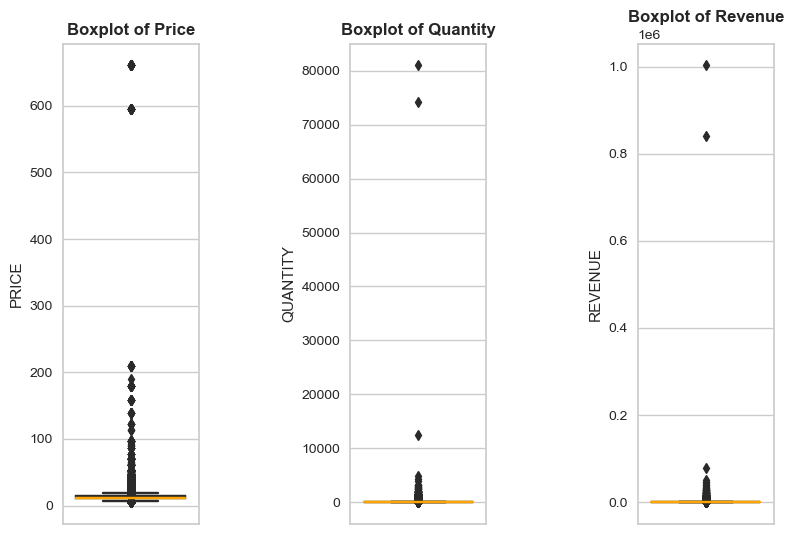

In [15]:
cols = ['Price', 'Quantity', 'Revenue']
fig, ax = plt.subplots(1, 3)
for i in range(len(cols)):
    sns.boxplot(y = cols[i], data = cleaned_df, color = 'darkblue',
                medianprops = {'color' : 'orange'}, ax = ax[i])
    ax[i].set_ylabel(cols[i].upper())
    ax[i].set_title(f'Boxplot of {cols[i]}', weight = 'bold')

plt.tight_layout(w_pad = 5)

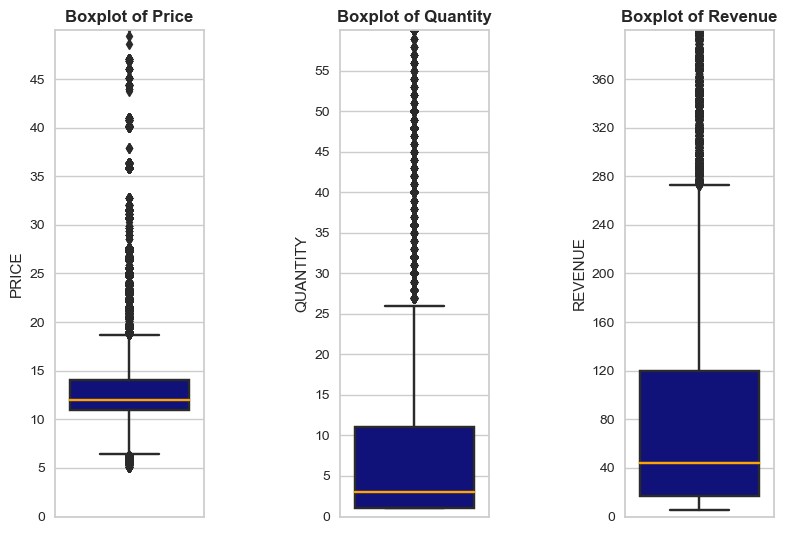

In [16]:
cols = ['Price', 'Quantity', 'Revenue']
fig, ax = plt.subplots(1, 3)
for i in range(len(cols)):
    sns.boxplot(y = cols[i], data = cleaned_df, color = 'darkblue',
                medianprops = {'color' : 'orange'}, ax = ax[i])
    if cols[i] == 'Price':
        ax[i].set_ylabel('PRICE')
        ax[i].set_ylim([0, 50])
        ax[i].set_yticks(range(0, 50, 5))
    elif cols[i] == 'Quantity':
        ax[i].set_ylabel('QUANTITY')
        ax[i].set_ylim([0, 60])
        ax[i].set_yticks(range(0, 60, 5))
    else:
        ax[i].set_ylabel('REVENUE')
        ax[i].set_ylim([0, 400])
        ax[i].set_yticks(range(0, 400, 40))

    ax[i].set_title(f'Boxplot of {cols[i]}', weight = 'bold')
plt.tight_layout(w_pad = 5)

> **Nhận định**:

>> - **Giá (Price)**: Khoảng giá điển hình nằm trong khoảng từ khoảng 11 GBP đến 14 GBP. Tuy nhiên, có những giá trị ngoại lai dưới khoảng 10 GBP và trên 15 GBP, với một số giá trị đạt tới hơn 500 GBP.
>> - **Số lượng (Quantity)**: Số lượng điển hình cho các giao dịch dao động từ 1 đến khoảng 11. Trong khi một số giá trị ngoại lai vượt quá 26, hai trường hợp đặc biệt đạt tới hơn 70,000 đơn vị.
>> - **Doanh thu (Revenue)**: Doanh thu điển hình từ các giao dịch thương mại điện tử này dao động từ dưới 20 GBP đến khoảng 120 GBP. Tuy nhiên, một số giá trị ngoại lai tạo ra hơn 300 GBP, với hai trường hợp vượt quá 800,000 GBP.

Dựa trên phân tích biểu đồ hộp, các giao dịch ngoại lệ có các đặc điểm sau:

- **Số lượng (Quantity)**: trên 70,000
- **Doanh thu (Revenue)**: trên 800,000

In [17]:
cleaned_df[(cleaned_df['Quantity'] > 70000) | (cleaned_df['Revenue'] > 800000)]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Revenue,Year,Month,Day,DayOfWeek
142,581483,2019-12-09,23843,Paper Craft Little Birdie,12.38,80995,16446,United Kingdom,1002718.1,2019,12,9,0
473985,541431,2019-01-18,23166,Medium Ceramic Top Storage Jar,11.32,74215,12346,United Kingdom,840113.8,2019,1,18,4


> **Quan sát kỹ hơn** cho thấy rằng hai khách hàng thực hiện các giao dịch số lượng lớn này. Họ đã mua số lượng lớn các món quà lưu niệm, bao gồm **Paper Craft Little Birdie** và **Medium Ceramic Top Storage Jar**, dẫn đến các con số doanh thu bị đẩy lên cao. Do đó, chúng ta sẽ loại bỏ các giao dịch này.



In [18]:
cleaned_df = cleaned_df[~(cleaned_df['Quantity'] > 70000) | ~(cleaned_df['Revenue'] > 800000)]

**Tiếp theo, xem xét Top 10 quốc gia có lượng giao dịch nhiều nhất và Top 10 sản phẩm dduocj mua nhiều nhất**

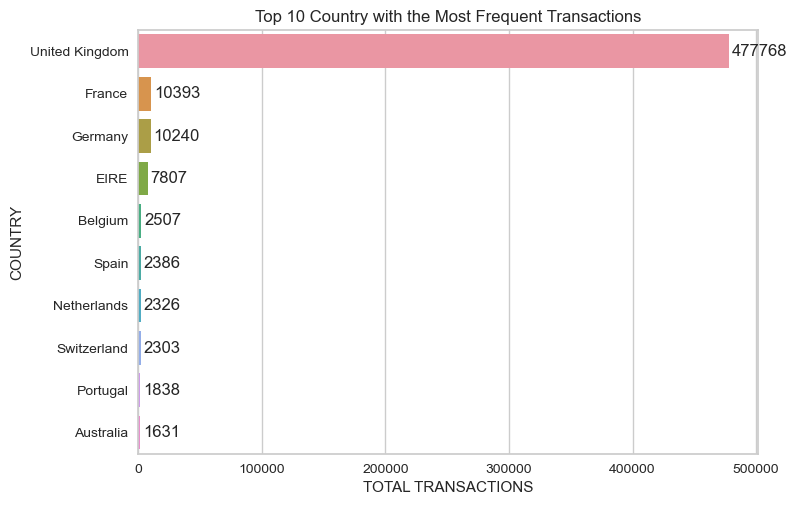

In [19]:
fig, ax = plt.subplots()
sns.countplot(y=cleaned_df['Country'], order=cleaned_df['Country'].value_counts().iloc[:10].index)
for container in ax.containers:
    ax.bar_label(container, padding=2)
ax.set_xlabel('TOTAL TRANSACTIONS')
ax.set_ylabel('COUNTRY')
ax.set_title('Top 10 Country with the Most Frequent Transactions')
plt.show()


> Vương quốc Anh thống trị số lượng giao dịch, chiếm tới 90% tổng số giao dịch (rõ ràng vì Vương quốc Anh là nền tảng của thương mại điện tử này). Tuy nhiên, một số quốc gia khác, bao gồm Pháp, Đức và Ireland, nắm giữ tỷ lệ đáng kể trong bộ dữ liệu.

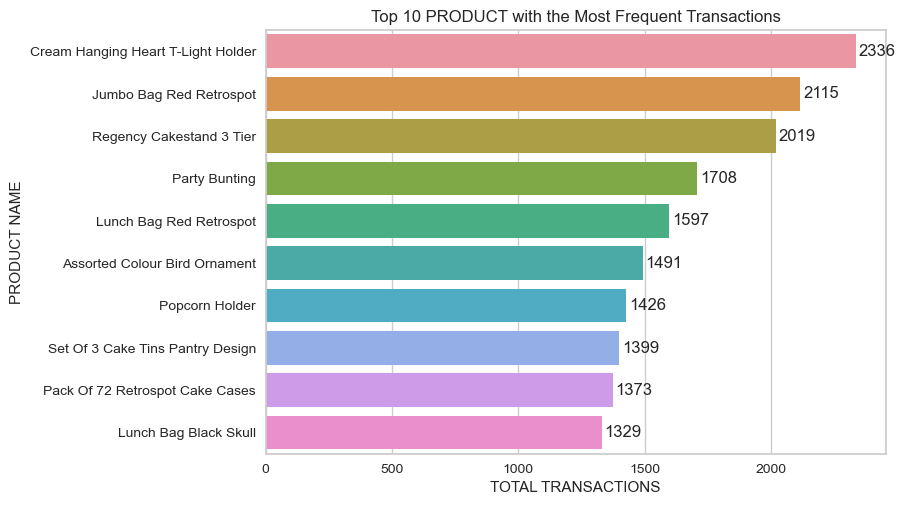

In [20]:
fig, ax = plt.subplots()
sns.countplot(y=cleaned_df['ProductName'], order=cleaned_df['ProductName'].value_counts().iloc[:10].index)
for container in ax.containers:
    ax.bar_label(container, padding=2)
ax.set_xlabel('TOTAL TRANSACTIONS')
ax.set_ylabel('PRODUCT NAME')
ax.set_title('Top 10 PRODUCT with the Most Frequent Transactions')
plt.show()

> Những sản phẩm bán chạy nhất này thuộc ba loại: trang trí nhà cửa, đồ dùng cho sự kiện, thực phẩm và đồ dùng nhà bếp. **Cream Hanging Heart T-Light Holder** là sản phẩm được ưa chuộng nhất từ ​​năm 2018 đến năm 2019.

**Tiếp theo, xem xét phân bổ các giao dịch theo thời gian**

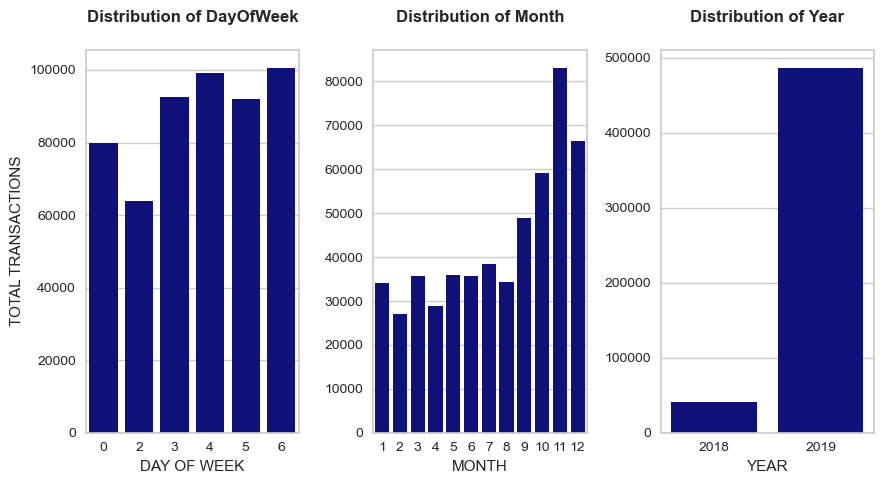

In [21]:
cols = ['DayOfWeek', 'Month', 'Year']
fig, ax = plt.subplots(1, 3, figsize = (9, 5))

for i in range(len(cols)):
    sns.countplot(x = cols[i], data = cleaned_df, color = 'darkblue', ax = ax[i])
    ax[i].set_title(f'Distribution of {cols[i]}', pad = 20, weight = 'bold' )
    if i == 0:
        ax[i].set_ylabel('TOTAL TRANSACTIONS' )
        ax[i].set_xlabel('DAY OF WEEK' )
    elif i == 1:
        ax[i].set_ylabel('')
        ax[i].set_xlabel('MONTH' )
    else:
        ax[i].set_ylabel('')
        ax[i].set_xlabel('YEAR' )

plt.tight_layout()

> **Nhận định**
>> - **Số giao dịch theo ngày trong tuần:** chúng ta không thấy giao dịch vào Thứ ba có thể là do nền tảng k hoạt động vào thứ ba hoặc có sự thiếu sót dữ liệu.Ngoài ra Thứ Sáu và Chủ Nhật là nhưng ngày có số lượng giao dịch cao nhất
>> - **Số giao dịch theo tháng:** Có thể thấy một xu hướng là lượng giao dịch tăng dần về cuối năm. Tháng 11 là tháng có giao dịch cao nhất. Mẫu hình 'Mùa' này có thể suy luận từ việc mua sắm dịp lễ và việc tiêu dùng tăng cao vào thười gian đó trong năm.
>> - **Số giao dịch theo năm:** Ở đây nhận định sẽ không chính xác vì dữ liệu cho năm 2018 chỉ có tháng 12.

### **3.2.Hiệu suất bán hàng**

**Doanh thu theo thời gian**

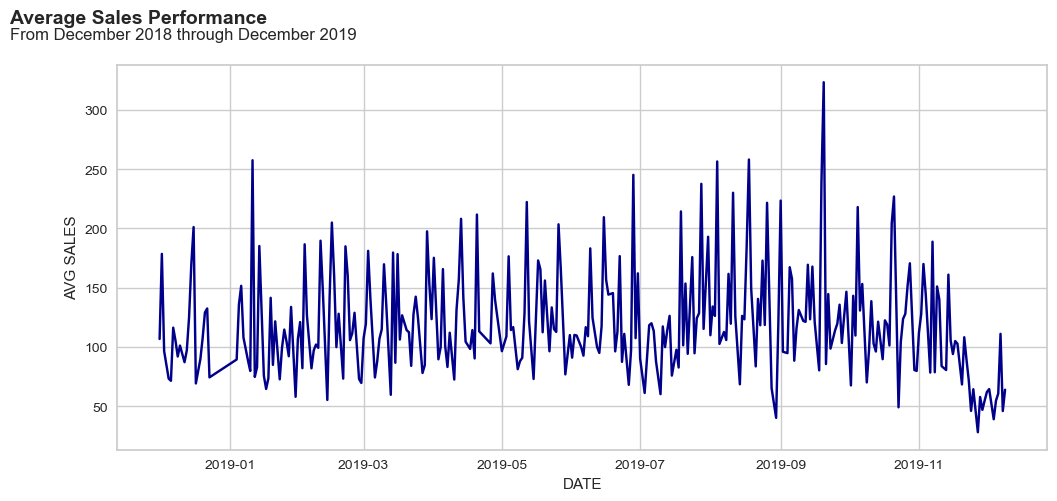

In [22]:
fig, ax = plt.subplots(figsize = (12, 5))

sns.lineplot(x = 'Date', y = 'Revenue', data = cleaned_df, ci = None, color = 'darkblue', ax = ax)
ax.set_xlabel('DATE')
ax.set_ylabel('AVG SALES')
ax.set_title('Average Sales Performance', pad = 30, size = 14, x = -0.115, weight = 'bold',ha = 'left')
ax.text(s = 'From December 2018 through December 2019', x = pd.Timestamp('2018-09-26'), y = 360)

plt.show()

> Về tổng thể, xu hướng doanh thu tương đối ổn định, với sự suy giảm nhẹ về cuối năm 2019. Ngoài ra có một đỉnh doanh thu vào khảng tháng 9-10 năm 2019. Để có thể nhìn nhận ục thể hơn, chúng ta sẽ phân tích sâu vào doanh số theo ngày trong tháng và theo ngày trong tuần

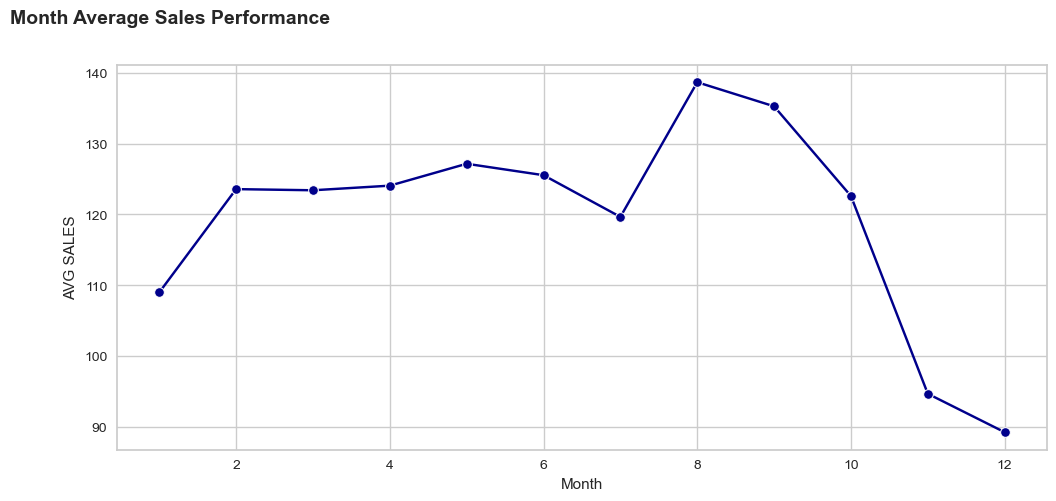

In [23]:
fig, ax = plt.subplots(figsize = (12, 5))

sns.lineplot(x = 'Month', y = 'Revenue', data = cleaned_df, ci = None, marker='o',color = 'darkblue', ax = ax)
ax.set_xlabel('Month')
ax.set_ylabel('AVG SALES')
ax.set_title('Month Average Sales Performance', pad = 30, size = 14, x = -0.115, weight = 'bold',ha = 'left')

plt.show()

> - Mặc dù có sự tăng trong số lượng giao dịch vào cuối năm, đặc biệt là vào tháng Mười Một, nhưng xu hướng doanh thu trung bình lại cho thấy một mẫu hình khác biệt. Trong khi số lượng giao dịch tăng từ tháng Chín đến tháng Mười Một, doanh thu trung bình giảm trong những tháng này.

> - Giả định rằng sự không nhất quán này có thể được giải thích bởi sự thay đổi trong hành vi mua sắm, người mua có thể chọn các sản phẩm có giá thấp hơn trong những thời gian cao điểm. Để hiểu rõ hơn về xu hướng doanh thu, cần xem xét giá trung bình và số lượng sản phẩm trung bình trong các tháng.

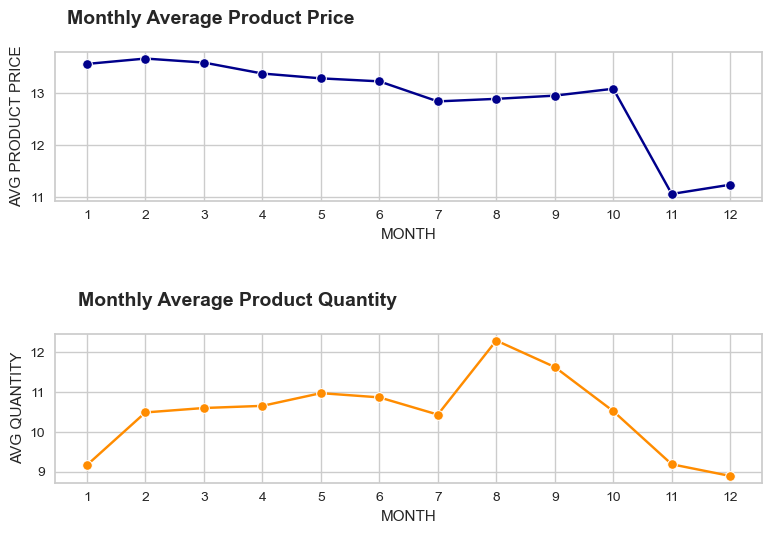

In [24]:
price_qty = ['Price', 'Quantity']
fig, ax = plt.subplots(2, 1)

for i in range(len(price_qty)):
    if i == 0:
        sns.lineplot(x = 'Month', y = price_qty[i], data = cleaned_df, ci = None, color = 'darkblue', marker = 'o', ax = ax[i])
        ax[i].set_title('Monthly Average Product Price', pad = 20, x = 0.22, size = 14, weight = 'bold')
        ax[i].set_ylabel('AVG PRODUCT PRICE')
    else:
        sns.lineplot(x = 'Month', y = price_qty[i], data = cleaned_df, ci = None, color = 'darkorange', marker = 'o', ax = ax[i])
        ax[i].set_title('Monthly Average Product Quantity', pad = 20, x = 0.258, size = 14, weight = 'bold')
        ax[i].set_ylabel('AVG QUANTITY')

    ax[i].set_xlabel('MONTH')
    ax[i].set_xticks(range(1, 13))

plt.tight_layout(h_pad = 3)

> Có thể thấy nguyên nhân cơ bản đằng sau sự tăng cao về khối lượng giao dịch nhưng doanh số bán hàng thấp hơn từ tháng 9 đến tháng 12. Trong những tháng này, hành vi mua sắm của khách hàng dịch chuyển sang các sản phẩm có giá thấp hơn cùng với số lượng sản phẩm nhỏ hơn. Phân tích sâu hơn trong tương lai có thể đi vào chiến lược để duy trì sức mua của khách hàng và ngăn chặn sự suy giảm đột ngột trong doanh thu.

**Hiệu suất bán hàng hằng ngày**

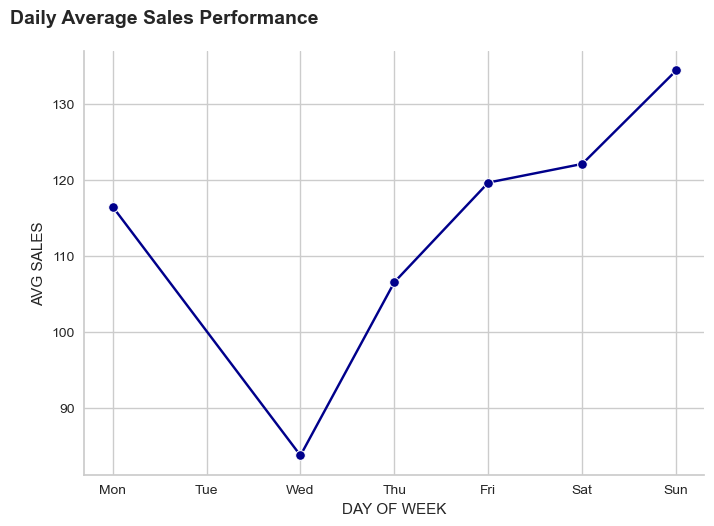

In [25]:
fig, ax = plt.subplots()

sns.lineplot(x = 'DayOfWeek', y = 'Revenue', data = cleaned_df, ci = None, color = 'darkblue', marker = 'o', ax = ax)
sns.despine(right = True)
ax.set_xticks(range(0, 7), labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax.set_xlabel('DAY OF WEEK')
ax.set_ylabel('AVG SALES')
ax.set_title('Daily Average Sales Performance', pad = 20, size = 14, x = -0.12, weight = 'bold', ha = 'left')
plt.show()

> Có thể thấy doanh số có xu hương tăng vào cuối tuần, với doanh số đạt đỉnh vào chủ nhật. Ngược lại, sức mua yêu hơn vào giữa tuần từ Thứ Ba đến Thứ Tư. Có thể do người tiêu dùng tập trung vào công việc hoặc học tập hơn vào thời gian này thay vì mua sắm.

**Với lượng sản phẩm gồm 3.753 mặt hàng, nền tảng thương mại điện tử này mang đến cho khách hàng nhiều lựa chọn đa dạng. Để xác định những sản phẩm có ảnh hưởng nhất thúc đẩy doanh số bán hàng, chúng ta sẽ phân tích 10 sản phẩm đóng góp nhiều nhất vào tổng doanh thu.**

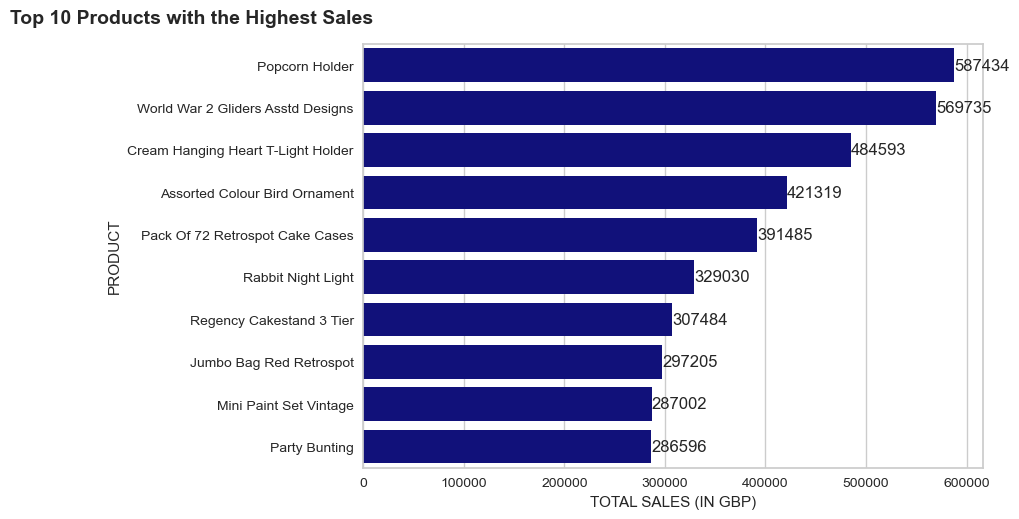

In [26]:
product_sales = cleaned_df.groupby('ProductName', as_index = False)['Revenue'].sum()

fig, ax = plt.subplots()

sns.barplot(x = 'Revenue', y = 'ProductName',data = product_sales.sort_values('Revenue', ascending = False).iloc[:10], color = 'darkblue', ax = ax)

ax.bar_label(ax.containers[0])
ax.set_xlabel('TOTAL SALES (IN GBP)')
ax.set_ylabel('PRODUCT')
ax.set_title('Top 10 Products with the Highest Sales', size = 14, x = -0.57, pad = 15, weight = 'bold', ha = 'left')
plt.show()

> 10 sản phẩm hàng đầu có tổng doanh số cao nhất thể hiện sự kết hợp đa dạng giữa hàng gia dụng, đồ trang trí và đồ chơi, trong đó **Popcorn Holder** là sản phẩm bán chạy nhất trong 12 tháng qua.

## **4.Xây dựng mô hình**

### **4.1. Phân khúc khách hàng bằng RFM và Kmean**

**Giả định**

> Một công ty cần xác định các phân khúc khách hàng tiềm năng để giúp nhắm mục tiêu thị trường một cách tốt hơn và hiệu quả hơn. Thông tin này sẽ đảm bảo rằng tất cả các chiến dịch và nỗ lực tiếp thị trong tương lai đều được hướng đến những khách hàng có khả năng thanh toán và mua hàng cao.

> Để xác định các phân khúc trong cơ sở khách hàng hiện tại, chúng ta sẽ sử dụng thuật toán phân cụm k-means. Sau đó, chúng ta có thể xác định phân khúc khách hàng tốt nhất bằng cách sử dụng mô hình RFM (Recency, Frequency, Monetary). Từ đó sẽ đề xuất một số khuyến nghị kinh doanh phù hợp với các đặc điểm của phân khúc khách hàng tốt nhất.

#### **4.1.1.RFM Data**

**Đầu tiên cần gom theo** `CustomerNo` **rồi biến đổi để có được các thông tin sau:**

> - **Recency**: Chúng ta sẽ xác định thời gian gần đây bằng cách trừ ngày phân tích với ngày gần nhất được ghi nhận, giả sử việc phân tích được thực hiện một ngày sau ngày giao dịch cuối cùng được ghi nhận.
> - **Frequency**: Đối với mỗi khách hàng, chúng ta sẽ tính chỉ số tần suất bằng cách đếm số số mã giao dịch duy nhất của họ, cho biết tổng số giao dịch riêng biệt mà họ đã thực hiện.
> - **Monetary**: Chúng ta sẽ tổng hợp tổng số tiền mà mỗi khách hàng đã chi tiêu từ cột `Revenue`.

In [27]:
rfm_df = cleaned_df.groupby('CustomerNo', as_index = False)[['Revenue', 'TransactionNo', 'Date']]\
                   .agg({'Date' : 'max',
                         'TransactionNo' : 'nunique',
                         'Revenue' : 'sum',})

rfm_df.columns = ['CustomerNo', 'Recency', 'Frequency', 'Monetary']
rfm_df['Recency'] = pd.to_datetime(rfm_df['Recency'])
date = pd.to_datetime('2019-12-10')
rfm_df['Recency'] = date - rfm_df['Recency']
rfm_df['Recency'] = rfm_df['Recency'].dt.days

rfm_df

,CustomerNo,Recency,Frequency,Monetary
0,12004,228,1,1509.60
1,12006,219,1,24.76
2,12008,277,1,5689.57
3,12013,360,1,69.96
4,12024,177,1,149.52
...,...,...,...,...
4712,18280,278,1,623.26
4713,18281,181,1,576.58
4714,18282,8,2,1044.86
4715,18283,4,16,12114.61


> Dựa trên dữ liệu này, có tổng cộng 4.717 khách hàng.

#### **4.1.2. Xử lý Outlier**

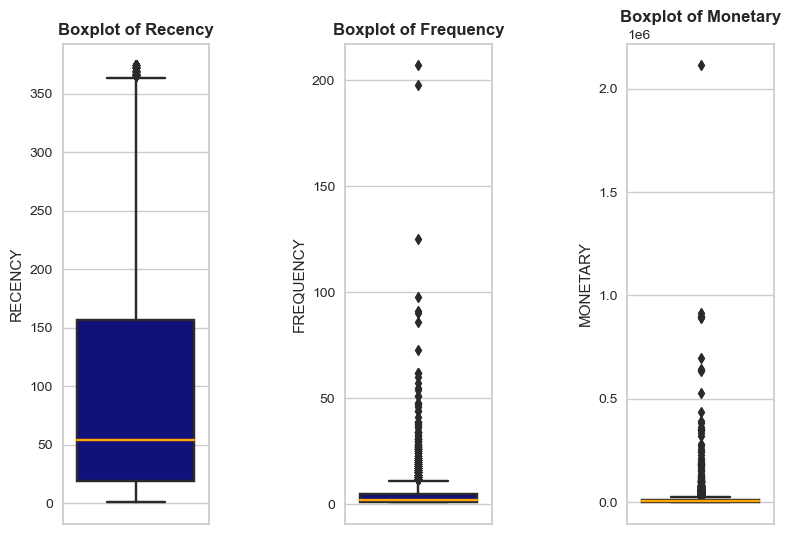

In [28]:
cols = rfm_df.columns[1:]
fig, ax = plt.subplots(1, 3)
for col in range(len(cols)):
    sns.boxplot(y = cols[col], data = rfm_df, color = 'darkblue',
                medianprops = {'color' : 'orange'}, ax = ax[col])
    ax[col].set_ylabel(cols[col].upper(),)
    ax[col].set_title(f'Boxplot of {cols[col]}', weight = 'bold')

plt.tight_layout(w_pad = 5)


**Nhận xét**
> Các biểu đồ boxplot cho thấy cả ba chỉ số Recency, Frequency và Monetary đều có sự xuất hiện của nhiều outliers (các giá trị ngoại lai). Điều này có thể ảnh hưởng đáng kể đến việc phân cụm, làm cho kết quả phân cụm không chính xác vì các outliers có thể làm sai lệch trung tâm của các cụm.

Do đó thực hiện xử lý theo quy tắc IQR

In [29]:
Q1 = rfm_df.quantile(0.25)
Q3 = rfm_df.quantile(0.75)
IQR = Q3 - Q1
rfm_df = rfm_df[~((rfm_df < (Q1 - 1.5 * IQR)) |(rfm_df > (Q3 + 1.5 * IQR))).any(axis=1)]

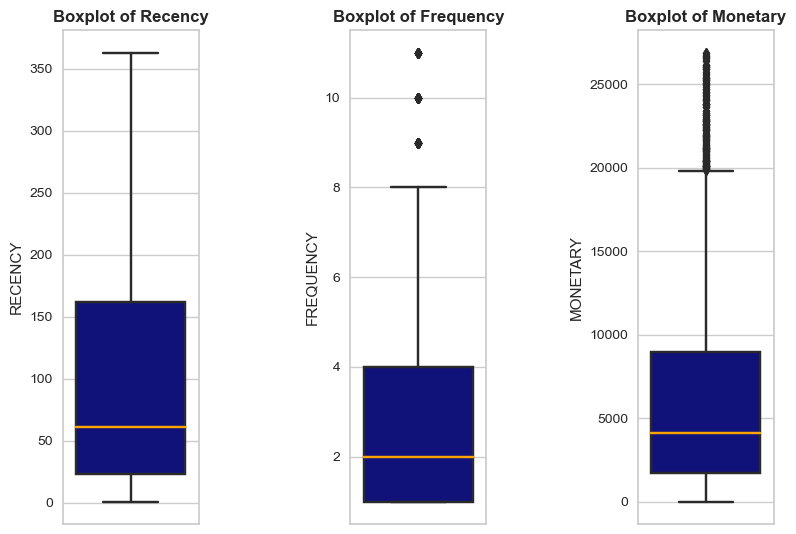

In [30]:
cols = rfm_df.columns[1:]
fig, ax = plt.subplots(1, 3)
for col in range(len(cols)):
    sns.boxplot(y = cols[col], data = rfm_df, color = 'darkblue',
                medianprops = {'color' : 'orange'}, ax = ax[col])
    ax[col].set_ylabel(cols[col].upper())
    ax[col].set_title(f'Boxplot of {cols[col]}', weight = 'bold')
plt.tight_layout(w_pad = 5)

#### **4.1.3. Scale**

> Vì các thuật toán phân cụm dựa vào việc tính toán khoảng cách để đánh giá sự tương đồng giữa các điểm dữ liệu, việc chuẩn hóa dữ liệu là rất quan trọng để đảm bảo kết quả phân cụm chính xác và có ý nghĩa. Việc chuẩn hóa sẽ làm cho dữ liệu trở nên đồng nhất, giới hạn các biến số có phạm vi lớn hơn, như `Monetary` trong trường hợp này, ảnh hưởng quá mức đến các tính toán khoảng cách. Việc này đảm bảo rằng tất cả các biến số đều tác động một cách đồng đều vào quá trình phân cụm, dẫn đến kết quả cân bằng và tốt hơn.

In [31]:
scaler = StandardScaler().set_output(transform = 'pandas')
scaler.fit(rfm_df.iloc[:, 1:])
rfm_df_std = scaler.transform(rfm_df.iloc[:, 1:])

rfm_df_std

,Recency,Frequency,Monetary
0,1.317194,-0.839731,-0.792759
1,1.224658,-0.839731,-1.042841
2,1.821002,-0.839731,-0.088752
3,2.674390,-0.839731,-1.035228
4,0.792823,-0.839731,-1.021828
...,...,...,...
4711,-0.266200,-0.839731,-0.903073
4712,1.831283,-0.839731,-0.942039
4713,0.833951,-0.839731,-0.949901
4714,-0.944798,-0.383334,-0.871032


#### **4.1.4.PCA**

Sử dụng PCA để giảm chiều dữ liệu, giảm sự tác động của đa cộng tuyến (các biến của RFM có tính đa cộng tuyến cao)

In [32]:
pca = PCA(n_components = 2)
pca.fit(rfm_df_std)
pca_df = pd.DataFrame(pca.transform(rfm_df_std), columns = ['pc1', 'pc2'])
pca_df.set_index(rfm_df.index, inplace = True)
pca_df

,pc1,pc2
0,-1.651068,0.577214
1,-1.756382,0.383149
2,-1.473448,1.332578
3,-2.459935,1.632246
4,-1.532801,0.021742
...,...,...
4711,-0.944037,-0.833771
4712,-1.992026,0.950537
4713,-1.509601,0.090027
4714,-0.304932,-1.298134


#### **4.1.5. Phân cụm với Kmean**

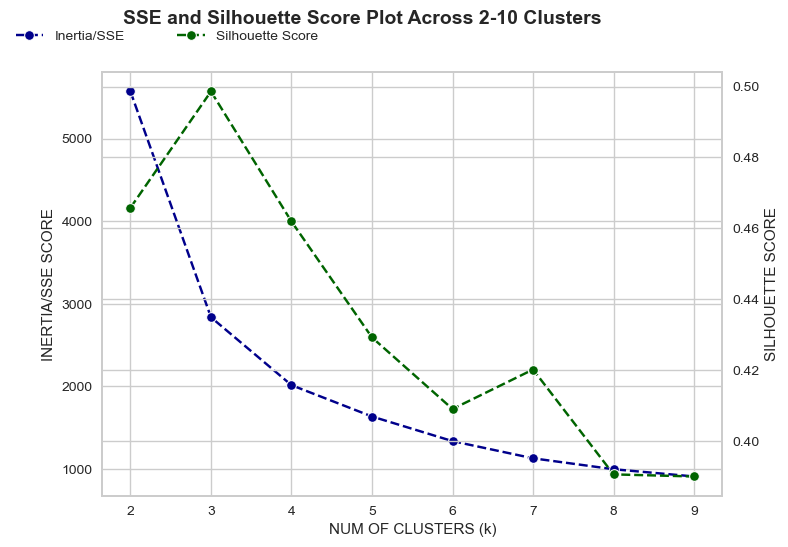

In [33]:
sse, silhouette = [], []

# Tính toán SSE và silhouette scores cho k từ 2 đến 10
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=10).fit(pca_df)
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(pca_df, kmeans.labels_))

fig, ax1 = plt.subplots()

# Vẽ đồ thị cho SSE Scores
sns.lineplot(x=range(2, 10), y=sse, marker='o', linestyle='--', color='darkblue', label='Inertia/SSE', ax=ax1)

# Vẽ đồ thị cho Silhouette Scores trên trục y thứ hai
ax2 = ax1.twinx()
sns.lineplot(x=range(2, 10), y=silhouette, marker='o', linestyle='--', color='darkgreen', label='Silhouette Score', ax=ax2)


ax1.set_xlabel('NUM OF CLUSTERS (k)')
ax1.set_ylabel('INERTIA/SSE SCORE')
ax2.set_ylabel('SILHOUETTE SCORE')

ax2.set_title('SSE and Silhouette Score Plot Across 2-10 Clusters', size=14, pad = 35,
              x = 0.42, weight='bold')
ax1.legend(loc=2, frameon=False, bbox_to_anchor = [-0.16, 1.13])
ax2.legend(loc=2, frameon=False, bbox_to_anchor = [0.1, 1.13])

plt.show()


> Chúng ta có thể thấy rằng giá trị tối ưu của k là 3, giá trị này có điểm hình bóng cao nhất và nằm ở phần 'khuỷu tay' của biểu đồ SSE. Chúng ta có thể kiểm tra thêm bằng biểu đồ hình bóng.

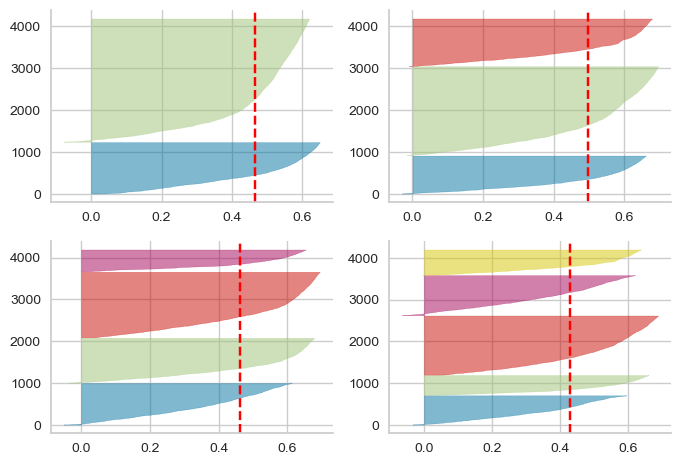

In [34]:
fig, ax = plt.subplots(2, 2)

for k in range(2, 6):
    km = KMeans(n_clusters = k, random_state = 10)
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(pca_df)

sns.despine(right = True)
plt.show()

> Tất cả các giá trị k này cho thấy tỷ lệ cụm không cân bằng, nhưng k = 3 có vẻ ít mất cân bằng hơn các giá trị khác. Hơn nữa, k = 3 cho thấy điểm bóng âm ít nhất trên mỗi cụm.

**Áp dụng k bằng 3 trong quá trình phân cụm và lấy nhãn cụm.**

In [35]:
km = KMeans(n_clusters = 3, random_state = 10)
km.fit(pca_df)

pca_df['Cluster'] = km.labels_
rfm_df['Cluster'] = pca_df['Cluster']

**Phân tích kết quả phân cụm**

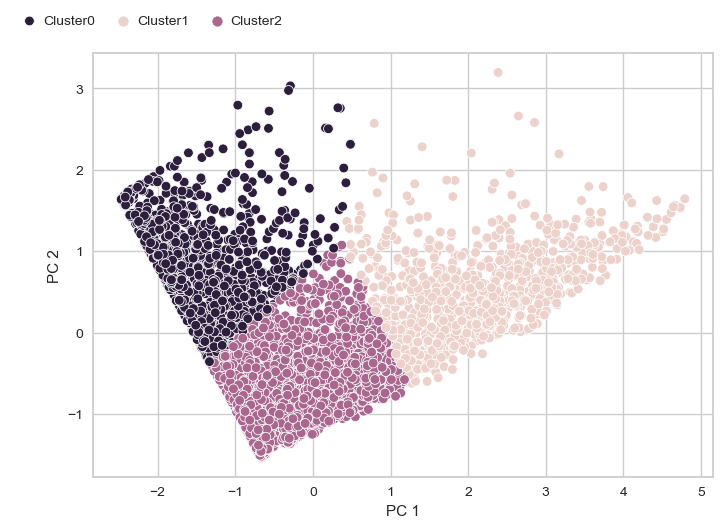

In [36]:
fig, ax = plt.subplots()
sns.scatterplot(x='pc1', y='pc2', hue='Cluster', data=pca_df, ax=ax)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend(loc=2, ncol=3, frameon=False, bbox_to_anchor=[-0.145, 1.12],
          labels=['Cluster' + str(i) for i in sorted(pca_df['Cluster'].unique())],
          handletextpad=0, columnspacing=1)
plt.show()


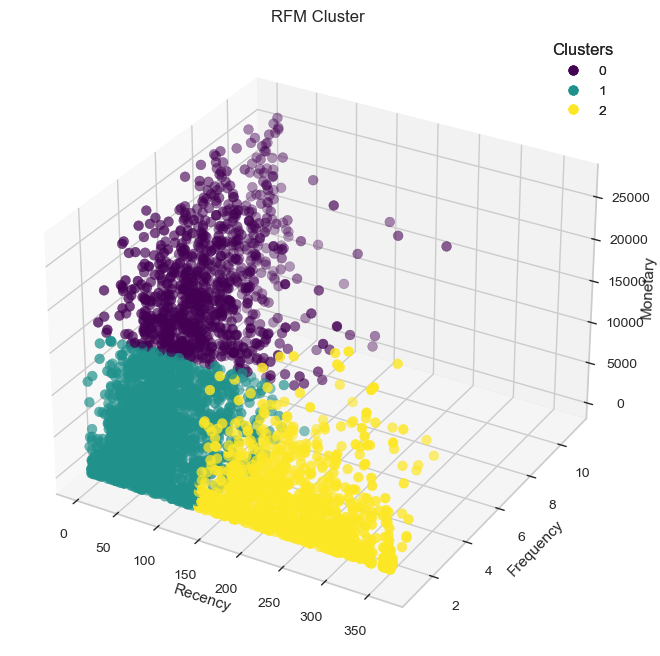

In [37]:
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'],c=rfm_df['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('RFM Cluster')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


> Vẫn có một số điểm chưa thật sự tốt. Mặc dù vậy hình dạng tổng thể trên biểu đồ cho ta thấy kết quả phân cụm khá ổn để có thể sử dụng được.

**Tóm tắt kết quả phân cụm và so sánh**

In [38]:
rfm_cluster_summary = rfm_df.groupby('Cluster').agg({'Recency' : ['mean', 'median', 'min', 'max'],
                               'Frequency' : ['mean', 'median', 'min', 'max'],
                               'Monetary' : ['mean', 'median', 'min', 'max']})
rfm_cluster_summary

Recency                  Frequency                     Monetary  \
               mean median  min  max      mean median min max          mean   
Cluster                                                                       
0         39.603753   25.0    1  265  5.994481    6.0   1  11  14903.661402   
1         51.144880   43.0    1  173  2.236904    2.0   1   7   4258.441505   
2        239.759079  239.0  134  363  1.440213    1.0   1   6   2920.369522   

                                       
            median      min       max  
Cluster                                
0        14589.185  1657.98  26875.24  
1         3509.620     5.97  17016.46  
2         1846.660    11.53  21255.40

Dựa trên số liệu thống kê tóm tắt của các cụm đã xác định, chúng ta có thể  gắn nhãn cho từng cụm như sau:

> - **Nhóm 0**: Khách hàng không thường xuyên (R, F và M vừa phải)
> - **Nhóm 1**: Khách hàng có nguy cơ (R cao nhất, F và M thấp nhất)
> - **Nhóm 2**: Khách hàng trung thành (R thấp nhất, F và M cao nhất)

In [39]:
cluster_map = {0 : 'Occasional',
               1 : 'At Risk',
               2 : 'Loyal'}

rfm_df['ClusterName'] = rfm_df['Cluster'].map(cluster_map)

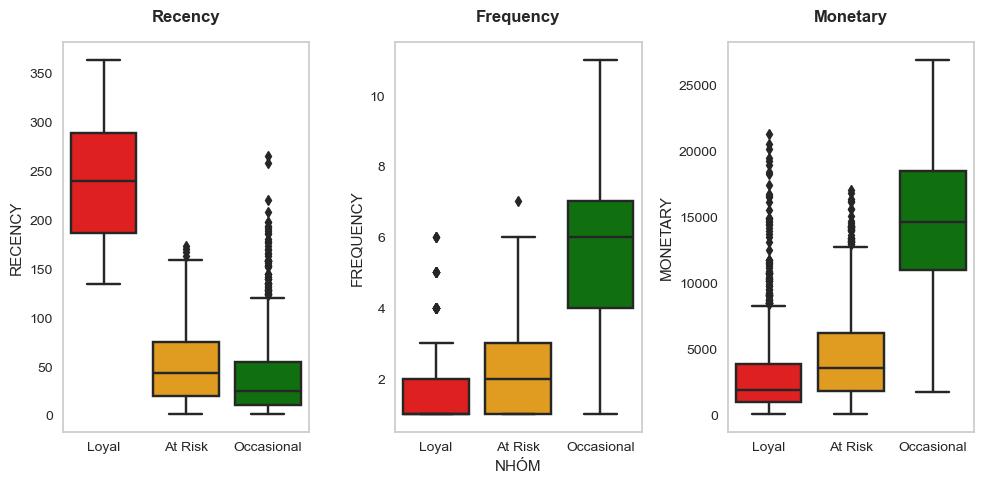

In [40]:
# Lấy tên biến RFM
cols = rfm_df.columns.tolist()[1:4]

# Box plot cho mỗi nhóm so sánh trung vị của biến RFM
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
for i in range(len(cols)):
    sns.boxplot(x=rfm_df['ClusterName'], y=rfm_df[cols[i]], palette=['red', 'orange', 'green'], ax=ax[i])
    ax[i].set_title(cols[i], pad=15, weight='bold')
    if i == 0:
        ax[i].set_ylabel('RECENCY')
        ax[i].set_xlabel('')
    elif i == 1:
        ax[i].set_ylabel('FREQUENCY')
        ax[i].set_xlabel('NHÓM')
    else:
        ax[i].set_ylabel('MONETARY')
        ax[i].set_xlabel('')
    ax[i].grid(False)

plt.tight_layout()


Chúng ta có thể nhận thấy các đặc điểm chính của từng nhóm khách hàng:

- **Nhóm khách hàng có nguy cơ:**
  - Recency cao: Khách hàng không thực hiện giao dịch gần đây, cho thấy nguy cơ mất quan tâm.
  - Frequency và Monetary thấp: Họ mua hàng ít và chi tiêu ít khi mua hàng.

- **Nhóm Khách hàng không thường xuyên:**
  - Recency và Frequency vừa: Họ thực hiện giao dịch một cách vừa phải.
  - Monetary vừa: Họ chi tiêu một số tiền trung bình cho mỗi giao dịch.

- **Khách hàng trung thành:**
  - Recency thấp: Họ thực hiện giao dịch gần đây, cho thấy tính chất tích cực.
  - Frequency và Monetary cao: Họ mua hàng thường xuyên và chi tiêu nhiều.

Dựa trên các đặc điểm này, cụm Khách hàng Trung Thành là mục tiêu tiềm năng để nhắm đến.

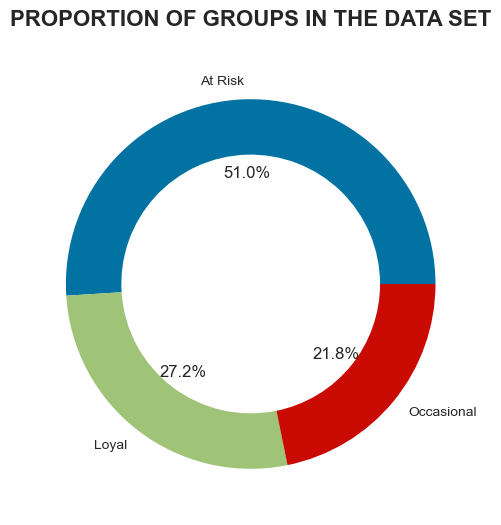

In [41]:
cluster_size = rfm_df['ClusterName'].value_counts(normalize=True).mul(100).round(2).reset_index()
cluster_size.columns = ['ClusterName', 'Percentage']
plt.figure(figsize=(8, 6))
plt.pie(cluster_size['Percentage'], labels=cluster_size['ClusterName'], autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('PROPORTION OF GROUPS IN THE DATA SET', weight='bold', size=16, pad=20)
plt.show()


Tóm lại, phân tích dữ liệu cho thấy rằng trong tệp dữ liệu khách hàng của  công ty, có ba nhóm chính: Khách hàng Không thường xuyên, Khách hàng Có nguy cơ và Khách hàng Trung thành.

> - Khách hàng Không thường xuyên chiếm phần lớn, với 51.02% .
> - Tiếp theo là nhóm Khách hàng Có nguy cơ, với 27.16% .
> - Nhóm ít nhất là Khách hàng Trung thành, chỉ có 21.82%.

Nhìn chung, số lượng khách hàng thực sự trung thành với cửa hàng và sản phẩm ít hơn so với nhóm khách hàng không thường xuyên và có nguy cơ, điều này đáng lo ngại.

**Để giải quyết vấn đề này, công ty có thể thực hiện các chiến lược sau:**

1. **Tăng cường tương tác và giao tiếp:** Tạo ra các chiến dịch tiếp thị và quảng cáo để tăng cường tương tác với khách hàng hiện tại. Sử dụng email marketing, tin nhắn và mạng xã hội để liên lạc và tương tác thường xuyên với khách hàng, đảm bảo họ cảm thấy được quan tâm và đánh giá.

2. **Cải thiện trải nghiệm khách hàng:** Tập trung vào cải thiện trải nghiệm mua sắm trực tuyến bằng cách tối ưu hóa giao diện website, cải thiện tính dễ sử dụng và tăng tính tương tác của nền tảng. Đảm bảo quy trình mua hàng trơn tru và thuận tiện sẽ giúp tăng sự hài lòng của khách hàng.

3. **Tạo chương trình khuyến mãi và ưu đãi:** Phát triển các chương trình khuyến mãi và ưu đãi đặc biệt dành cho khách hàng trung thành để khuyến khích họ tiếp tục mua sắm và gắn bó với thương hiệu của  công ty. Cung cấp điểm thưởng, phiếu quà tặng và giảm giá độc quyền là những cách hiệu quả để tạo ra sự hứng thú và khích lệ khách hàng quay lại mua hàng.

4. **Nghiên cứu và phân tích:** Tiến hành nghiên cứu để hiểu rõ hơn về nhu cầu và mong muốn của từng nhóm khách hàng. Dựa vào thông tin này, tinh chỉnh chiến lược tiếp thị và sản phẩm để đáp ứng tốt hơn nhu cầu của khách hàng và tăng cường sự hài lòng.

Kết hợp các chiến lược này sẽ giúp công ty tăng cường cam kết và tương tác với khách hàng, từ đó tạo ra một cộng đồng khách hàng trung thành và ổn định hơn đối với thương hiệu của  công ty.

### **4.2.Khai phá luật kết hợp**

#### **4.2.1.Sử dụng Apriori**

> Như vấn đề đã đề cập ở trên việc công ty đang gặp tình trạng số lượng khách hàng thực sự trung thành với cửa hàng và sản phẩm ít hơn so với nhóm khách hàng không thường xuyên và có nguy cơ, điều này đáng lo ngại.

> Các chiến lược cũng đã được đưa ra để giải quyết vấn đề, bắt đầu thực hiện công ty sẽ muốn tìm các tập sản phẩm phổ biến trong các giao dịch để đề xuất sản phẩm, giảm giá khi mua cùng nhau cải thiện sự hài lòng của khách hàng khi mua hàng, và kích thích khách hàng mua hàng.

In [42]:
basket = cleaned_df.pivot_table(index='TransactionNo',
                        columns='ProductName',
                        aggfunc='size',
                        fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

In [43]:
basket.head(5)

ProductName,10 Colour Spaceboy Pen,12 Coloured Party Balloons,12 Daisy Pegs In Wood Box,12 Egg House Painted Wood,12 Hanging Eggs Hand Painted,12 Ivory Rose Peg Place Settings,12 Message Cards With Envelopes,12 Pencil Small Tube Woodland,12 Pencils Small Tube Red Retrospot,12 Pencils Small Tube Skull,...,Zinc Metal Heart Decoration,Zinc Star T-Light Holder,Zinc Sweetheart Soap Dish,Zinc Sweetheart Wire Letter Rack,Zinc T-Light Holder Star Large,Zinc T-Light Holder Stars Small,Zinc Top 2 Door Wooden Shelf,Zinc Willie Winkie Candle Stick,Zinc Wire Kitchen Organiser,Zinc Wire Sweetheart Letter Tray
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dữ liệu trên đang thể hiện số lượng của từng sản phẩm được mua trong mỗi giao dịch (TransactionNo). Mỗi hàng tương ứng với một giao dịch và mỗi cột tương ứng với một sản phẩm. Cụ thể:

Mỗi giá trị trong bảng cho biết số lượng của mỗi sản phẩm được mua trong một giao dịch cụ thể.
Ví dụ, giá trị ở hàng đầu tiên, cột "10 Colour Spaceboy Pen" và "12 Coloured Party Balloons" đều là 0, ngụ ý rằng trong giao dịch đó không có sản phẩm nào được mua.
Giá trị ở hàng thứ hai, cột "12 Daisy Pegs In Wood Box" và "12 Egg House Painted Wood" cũng đều là 0, tương tự như vậy.

In [44]:
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [45]:
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
47,0.114671,(Cream Hanging Heart T-Light Holder)
109,0.105726,(Jumbo Bag Red Retrospot)
204,0.100521,(Regency Cakestand 3 Tier)
163,0.085258,(Party Bunting)
133,0.079193,(Lunch Bag Red Retrospot)
...,...,...
281,0.020114,(Vintage Snakes & Ladders)
82,0.020064,(Hand Warmer Red Love Heart)
42,0.020064,(Circus Parade Lunch Box)
34,0.020064,(Childrens Cutlery Polkadot Blue)


In [46]:
rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(60 Teatime Fairy Cake Cases),(Pack Of 72 Retrospot Cake Cases),0.041896,0.066812,0.022944,0.547648,8.196903,0.020145,2.062969,0.916396
1,(Pack Of 72 Retrospot Cake Cases),(60 Teatime Fairy Cake Cases),0.066812,0.041896,0.022944,0.343419,8.196903,0.020145,1.459232,0.940863
2,(Alarm Clock Bakelike Pink),(Alarm Clock Bakelike Green),0.039571,0.049578,0.021125,0.533844,10.767762,0.019163,2.038850,0.944506
3,(Alarm Clock Bakelike Green),(Alarm Clock Bakelike Pink),0.049578,0.039571,0.021125,0.426096,10.767762,0.019163,1.673500,0.954450
4,(Alarm Clock Bakelike Green),(Alarm Clock Bakelike Red),0.049578,0.053116,0.032344,0.652396,12.282540,0.029711,2.724028,0.966501
5,(Alarm Clock Bakelike Red),(Alarm Clock Bakelike Green),0.053116,0.049578,0.032344,0.608944,12.282540,0.029711,2.430398,0.970112
6,(Alarm Clock Bakelike Pink),(Alarm Clock Bakelike Red),0.039571,0.053116,0.023753,0.600255,11.300908,0.021651,2.368723,0.949067
7,(Alarm Clock Bakelike Red),(Alarm Clock Bakelike Pink),0.053116,0.039571,0.023753,0.447193,11.300908,0.021651,1.737367,0.962643
8,(Charlotte Bag Suki Design),(Charlotte Bag Pink Polkadot),0.044575,0.037550,0.020721,0.464853,12.379594,0.019047,1.798477,0.962108
9,(Charlotte Bag Pink Polkadot),(Charlotte Bag Suki Design),0.037550,0.044575,0.020721,0.551817,12.379594,0.019047,2.131775,0.955085


**Các thông số trong kết quả mô tả về mối tương quan giữa các sản phẩm trong tập dữ liệu:**
- Antecedents (Tiền đề): Là các sản phẩm xuất hiện trước trong quy tắc kết hợp.
- Consequents (Hậu quả): Là các sản phẩm xuất hiện sau trong quy tắc kết hợp.
- Antecedent Support (Hỗ trợ cho tiền đề): Tỷ lệ của các giao dịch chứa tiền đề so với tổng số giao dịch.
- Consequent Support (Hỗ trợ cho hậu quả): Tỷ lệ của các giao dịch chứa hậu quả so với tổng số giao dịch.
- Support (Hỗ trợ): Tỷ lệ của các giao dịch chứa cả tiền đề và hậu quả so với tổng số giao dịch.
- Confidence (Độ tin cậy): Xác suất của hậu quả xuất hiện khi đã biết tiền đề xuất hiện.
- Lift (Tăng cường): Tỉ lệ giữa confidence và consequent support, thể hiện mức độ tăng cường của việc mua hậu quả khi đã biết tiền đề so với việc mua hậu quả mà không cần biết tiền đề.
- Leverage (Đòn bẩy): Độ chênh lệch giữa support của cả tiền đề và hậu quả so với sự xuất hiện độc lập của chúng.
- Conviction (Sự thuyết phục): Đo lường mức độ mà hậu quả không phụ thuộc vào tiền đề, được tính dựa trên mối liên hệ giữa confidence và consequent support.
- Zhang's Metric (Thước đo của Zhang): Một thước đo khác để đánh giá mức độ mà tiền đề và hậu quả tương quan với nhau.

**Kết luận**
> - **Thiết Kế Các Gói Khuyến Mãi Hấp Dẫn:**
 - Thông tin: Với các cặp sản phẩm có tỉ lệ mua cùng nhau cao (high confidence), cửa hàng có thể thiết kế các gói khuyến mãi hoặc giảm giá cho các nhóm sản phẩm này.
 - Ứng dụng: Ví dụ, nếu "Alarm Clock Bakelike Green" và "Alarm Clock Bakelike Red" thường được mua cùng nhau, cửa hàng có thể tạo ra các gói khuyến mãi giảm giá khi mua cả hai sản phẩm.
> - **Tăng Doanh Số Bằng Chiến Lược Bán Kèm:**
 - Thông tin: Kết quả phân tích cung cấp các thông tin về lift (mức độ tăng khả năng mua sản phẩm kết hợp) và confidence (mức độ tin cậy của việc mua sản phẩm cùng nhau).
 - Ứng dụng: Cửa hàng có thể áp dụng chiến lược bán kèm cho các sản phẩm có lift cao. Ví dụ, khi khách hàng mua "Charlotte Bag Pink Polkadot", hệ thống có thể gợi ý mua thêm "Red Retrospot Charlotte Bag" với một mức giảm giá nhỏ, dựa trên việc hai sản phẩm này thường được mua cùng nhau.
> - **Cải Thiện Chiến Lược Marketing:**
 - Thông tin: Kết quả từ thuật toán Apriori giúp xác định các sản phẩm nào có mối liên hệ mạnh mẽ với nhau.
 - Ứng dụng: Cửa hàng có thể sử dụng thông tin này để thực hiện các chiến dịch quảng cáo tập trung vào các nhóm sản phẩm liên quan. Điều này giúp tăng hiệu quả của các chiến dịch quảng cáo và tối ưu hóa chi phí marketing.

#### **4.2.2.Sử dụng FP-Growth**

Tìm các mẫu sản phẩm đặc trưng cho từng quốc gia. Điều này có thể giúp hiểu rõ hơn về sở thích mua sắm của khách hàng từ các quốc gia khác nhau.
Từ đó có thể đưa ra các chính sách và khuyến mãi phù hợp với các từng quốc gia:

- Hiểu rõ hơn về sở thích mua sắm của khách hàng từ các quốc gia khác nhau.
- Phát triển các chiến lược tiếp thị và bán hàng được nhắm mục tiêu đến từng quốc gia.
- Khuyến mãi và đề xuất sản phẩm phù hợp với thị hiếu mua sắm của từng quốc gia.

**Từ Ma trận basket ở phần trước, thêm vào thông tin quốc gia**

In [47]:
transactions_country = df[['TransactionNo', 'Country']].drop_duplicates().set_index('TransactionNo')
basket = basket.join(transactions_country)

**Tìm luật kết hợp cho các quốc gia**

In [48]:
countries = basket['Country'].unique()

# Chọn quốc gia làm ví dụ
countries_example = ['Germany']

**Xây dựng hàm để tìm sản phẩm đặc trưng cho từng quốc gia**

In [49]:
def find_association_rules_for_selected_countries(basket_sets, countries_example):
    country_specific_products = {}

    for country in countries_example:
        print(f"Processing rules for {country}")
        basket_country = basket_sets[basket_sets['Country'] == country].drop(columns=['Country'])

        # Áp dụng thuật toán FP-Growth
        frequent_itemsets = fpgrowth(basket_country, min_support=0.01, use_colnames=True)

        # Tìm các luật kết hợp
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
        rules = rules.sort_values('lift', ascending=False).head(10)

        # Trích xuất các sản phẩm đặc trưng
        products = set()
        for _, row in rules.iterrows():
            products.update(row['antecedents'])
            products.update(row['consequents'])

        # Lưu kết quả vào từ điển
        country_specific_products[country] = list(products)

    return country_specific_products

**Sử dụng hàm đã định nghĩa để tìm sản phẩm đặc trưng cho từng quốc gia**

In [50]:
country_specific_products = find_association_rules_for_selected_countries(basket, countries_example)

for country, products in country_specific_products.items():
    print(f"Sản phẩm đặc trưng cho {country}:")
    for product in products:
        print(product)
    print()

Processing rules for Germany
Sản phẩm đặc trưng cho Germany:
Regency Cakestand 3 Tier
Pack Of 6 Skull Paper Cups
6 Ribbons Rustic Charm
Set Of Tea Coffee Sugar Tins Pantry
Round Storage Tin Vintage Leaf
Set Of 3 Regency Cake Tins
Set/6 Red Spotty Paper Cups
Gumball Coat Rack
Storage Tin Vintage Leaf
Pack Of 20 Skull Paper Napkins
Pack Of 6 Skull Paper Plates
Spaceboy Lunch Box
Red Harmonica In Box
Round Snack Boxes Set Of4 Woodland
Set/6 Red Spotty Paper Plates



> - **Hiểu hành vi mua hàng**: Bằng cách phân tích các mẫu mua hàng, ta có thể nhận biết các sản phẩm thường được mua cùng nhau bởi khách hàng từ cùng một quốc gia. Điều này giúp hiểu rõ hơn về sở thích, nhu cầu và hành vi mua sắm của khách hàng trong từng quốc gia cụ thể.
> - **Tối ưu hóa kinh doanh**: Các sản phẩm được xác định là đặc trưng cho mỗi quốc gia có thể được sử dụng để tối ưu hóa chiến lược kinh doanh, từ việc phát triển sản phẩm đến quảng cáo và tiếp thị.

### **4.3.Dự báo doanh thu**

Để có thể xác định việc chạy các chiến dịch có hiệu quả hay không thì chúng ta cần 1 thước đo, 1 điểm để so sánh. Do đó việc dự đoán doanh thu trong tương lai có thể giúp doanh nghiệp xem xét các yếu tố để có thể so sánh nó với thực tế, đánh giá hiệu quả của các chiến dịch trong tương lai.

#### **4.3.1. Tùy chỉnh lại bộ dữ liệu**

In [51]:
df_grouped = cleaned_df.groupby('Date')['Revenue'].sum().reset_index()
df_grouped.columns = ['Date', 'TotalRevenue']
df_grouped.head(10)

,Date,TotalRevenue
0,2018-12-01,326820.08
1,2018-12-02,367316.62
2,2018-12-03,206313.62
3,2018-12-05,197565.27
4,2018-12-06,273420.10
5,2018-12-07,337840.78
6,2018-12-08,269961.77
7,2018-12-09,253406.71
8,2018-12-10,270340.27
9,2018-12-12,125413.55


In [52]:
df_grouped['Date'] = pd.to_datetime(df_grouped['Date'])
df_grouped['Year'] = df_grouped['Date'].dt.year
df_grouped['Month'] = df_grouped['Date'].dt.month
df_grouped['Day'] = df_grouped['Date'].dt.day
df_grouped['DayOfWeek'] = df_grouped['Date'].dt.dayofweek
df_grouped.head(10)

,Date,TotalRevenue,Year,Month,Day,DayOfWeek
0,2018-12-01,326820.08,2018,12,1,5
1,2018-12-02,367316.62,2018,12,2,6
2,2018-12-03,206313.62,2018,12,3,0
3,2018-12-05,197565.27,2018,12,5,2
4,2018-12-06,273420.10,2018,12,6,3
5,2018-12-07,337840.78,2018,12,7,4
6,2018-12-08,269961.77,2018,12,8,5
7,2018-12-09,253406.71,2018,12,9,6
8,2018-12-10,270340.27,2018,12,10,0
9,2018-12-12,125413.55,2018,12,12,2


#### **4.3.2. LSTM**

**Xây dựng mô hình với tham số tốt nhất:**

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [54]:
from sklearn.base import BaseEstimator, RegressorMixin


In [55]:
# Chuẩn hóa dữ liệu về khoảng [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
df_grouped[['TotalRevenue', 'Year', 'Month', 'Day', 'DayOfWeek']] = \
    scaler.fit_transform(df_grouped[['TotalRevenue', 'Year', 'Month', 'Day', 'DayOfWeek']])

In [56]:
# Chia dữ liệu thành các chuỗi thời gian
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i + seq_length, 2:])
        y.append(data.iloc[i + seq_length, 1])
    return np.array(X), np.array(y)

In [57]:
seq_length = 6  # Độ dài chuỗi thời gian (chuỗi con)
X, y = create_sequences(df_grouped, seq_length)

In [58]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
# Lớp tuỳ chỉnh để sử dụng mô hình Keras với GridSearchCV
class KerasLSTMRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, units=100, activation='sigmoid', optimizer='adam', dropout=0.0, recurrent_dropout=0.0, epochs=10, batch_size=32, input_shape=(seq_length, 4)):
        self.units = units
        self.activation = activation
        self.optimizer = optimizer
        self.dropout = dropout
        self.recurrent_dropout = recurrent_dropout
        self.epochs = epochs
        self.batch_size = batch_size
        self.input_shape = input_shape
        self.model = None

    def build_model(self):
        model = Sequential([
            LSTM(units=self.units, activation=self.activation, input_shape=self.input_shape, dropout=self.dropout, recurrent_dropout=self.recurrent_dropout),
            Dense(units=1)
        ])
        model.compile(optimizer=self.optimizer, loss='mse')
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

In [79]:
# Tham số lưới mở rộng
param_grid = {
    'units': [20,25,30,35,40,45,50],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam'],
    'epochs': [30],
    'batch_size': [32],
    'dropout': [0.0, 0.2]
}

In [80]:
# Grid search
lstm_regressor = KerasLSTMRegressor(input_shape=(seq_length, X_train.shape[2]))
grid_search = GridSearchCV(estimator=lstm_regressor, param_grid=param_grid, cv=3, n_jobs=1)
grid_result = grid_search.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình với tham số tốt nhất
best_model = grid_result.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Data: {mse}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
3

In [81]:
# In ra các kết quả
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.203318 using {'activation': 'tanh', 'batch_size': 32, 'dropout': 0.0, 'epochs': 30, 'optimizer': 'adam', 'units': 40}


In [89]:
# Dự đoán và đánh giá mô hình với tham số tốt nhất
best_model = grid_result.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Data: {mse}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error on Test Data: 0.016778199472134433


**Biểu đồ thể hiện kết quả dự đoán**

In [93]:
# Đưa các dự đoán và giá trị thực tế trở lại tỷ lệ gốc của chúng
y_test_original = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], 4)), y_test.reshape(-1, 1)), axis=1))[:, 4]
y_pred_original = scaler.inverse_transform(np.concatenate((np.zeros((y_pred.shape[0], 4)), y_pred.reshape(-1, 1)), axis=1))[:, 4]

# Tạo DataFrame chứa giá trị dự đoán và giá trị thực tế
results_df_grouped = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original})

# Hiển thị DataFrame
print(results_df_grouped.head())



     Actual  Predicted
0  2.259655   2.426582
1  1.888951   2.451317
2  2.577624   2.223877
3  0.261030   1.451932
4  1.611663   1.626619


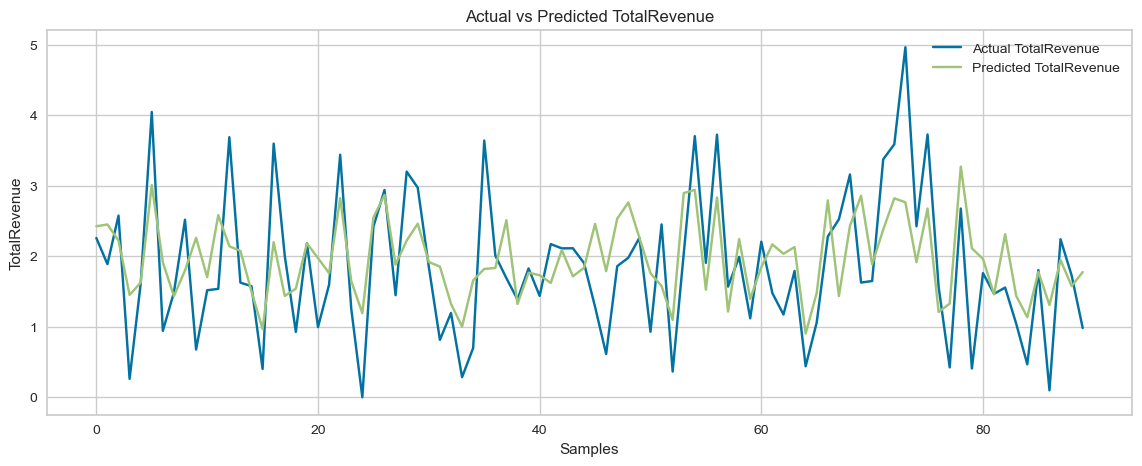

In [94]:
# Hiển thị kết quả so sánh bằng biểu đồ
plt.figure(figsize=(14, 5))
plt.plot(results_df_grouped['Actual'], label='Actual TotalRevenue')
plt.plot(results_df_grouped['Predicted'], label='Predicted TotalRevenue')
plt.title('Actual vs Predicted TotalRevenue')
plt.xlabel('Samples')
plt.ylabel('TotalRevenue')
plt.legend()
plt.show()

#### **4.4.3. ARIMA**

**Load lại data và định nghĩa hàm để đo lường các chỉ số lỗi**

In [66]:
def _measure_metric(y, yhat):
    e = y - yhat
    mse = np.mean(e**2)
    print('Mean Square Error (MSE): {}'.format(mse))
    return mse

# Load data và tính toán sai phân của dữ liệu hàng ngày
data = df_grouped.set_index('Date')
daily_data = data['TotalRevenue'].asfreq('D').fillna(0)  

Trong mô hình ARIMA \((p, d, q)\):
- \(p\) là bậc của phần tự hồi quy (AR)
- \(d\) là bậc của sai phân (differencing)
- \(q\) là bậc của phần trung bình trượt (MA)

**Phân tích**

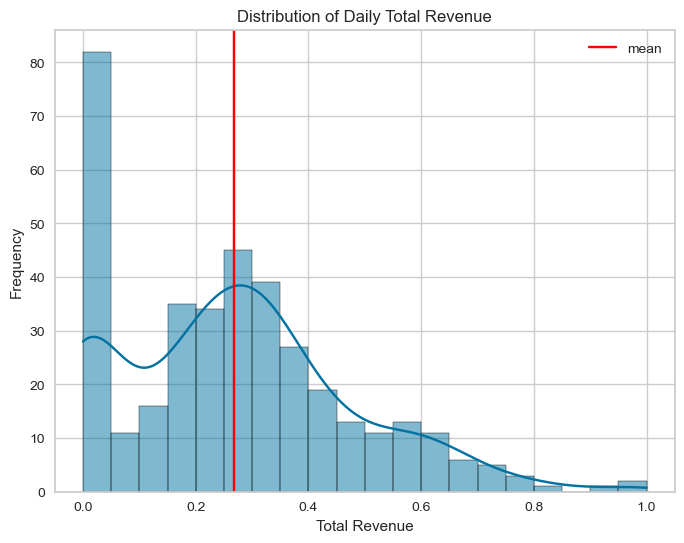

ADF Statistic for Original Data: -2.7430503807036386
p-value for Original Data: 0.06688030598621453


In [67]:
# Vẽ đồ thị phân phối của dữ liệu ban đầu
plt.figure(figsize=(8, 6))
sns.histplot(daily_data, bins=20, kde=True)
plt.axvline(x=daily_data.mean(), label='mean', c='red')
plt.title('Distribution of Daily Total Revenue')
plt.legend()
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()


# Kiểm tra ADF cho dữ liệu ban đầu
adf_result_original = adfuller(daily_data.dropna())
print('ADF Statistic for Original Data: {}'.format(adf_result_original[0]))
print('p-value for Original Data: {}'.format(adf_result_original[1]))

**Nhận xét với dữ liệu gốc:**

Giá trị p lớn hơn 0.05, điều này có nghĩa là không thể bác bỏ giả thuyết gốc (chuỗi thời gian có gốc đơn và không dừng).
Nói cách khác, dữ liệu gốc là không dừng.

**Tiếp tục cho sai phân bậc 1**

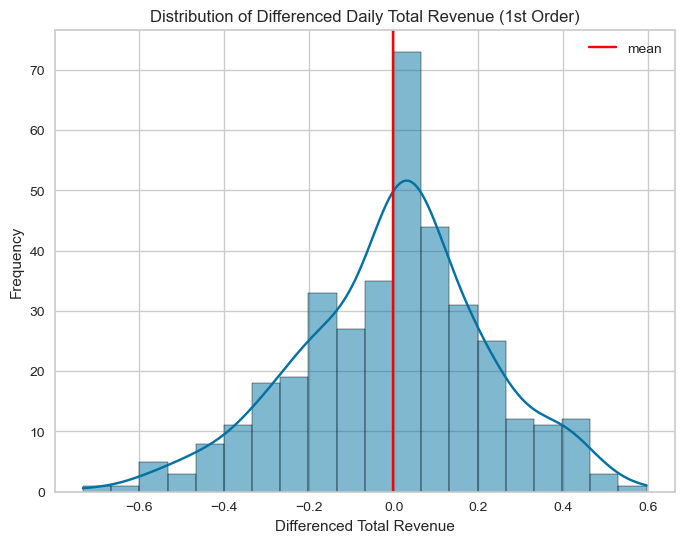

ADF Statistic for Differenced Data (1st Order): -8.152179095355663
p-value for Differenced Data (1st Order): 9.630054905687948e-13


In [68]:
# Tính toán sai phân lần thứ nhất
data_diff1 = daily_data.diff().dropna()

# Vẽ đồ thị phân phối của dữ liệu sai phân lần thứ nhất
plt.figure(figsize=(8, 6))
sns.histplot(data_diff1, bins=20, kde=True)
plt.axvline(x=data_diff1.mean(), label='mean', c='red')
plt.title('Distribution of Differenced Daily Total Revenue (1st Order)')
plt.legend()
plt.xlabel('Differenced Total Revenue')
plt.ylabel('Frequency')
plt.show()

# Kiểm tra ADF cho dữ liệu sai phân lần thứ nhất
adf_result_diff1 = adfuller(data_diff1)
print('ADF Statistic for Differenced Data (1st Order): {}'.format(adf_result_diff1[0]))
print('p-value for Differenced Data (1st Order): {}'.format(adf_result_diff1[1]))


**Dữ liệu sau khi lấy sai phân bậc 1:**
Giá trị p nhỏ hơn 0.05 rất nhiều, điều này có nghĩa là có thể bác bỏ giả thuyết gốc. 
Nói cách khác, dữ liệu sau khi lấy sai phân bậc 1 là dừng.

Vì chuỗi thời gian đã trở nên dừng sau khi lấy sai phân bậc 1, không cần thiết phải tiếp tục lấy sai phân bậc 2 và vẽ kết quả kiểm tra ADF. Sai phân bậc 1 đã đủ để làm chuỗi thời gian dừng.

**-> Nên chọn d = 1**

**Tiếp tục phân tích**

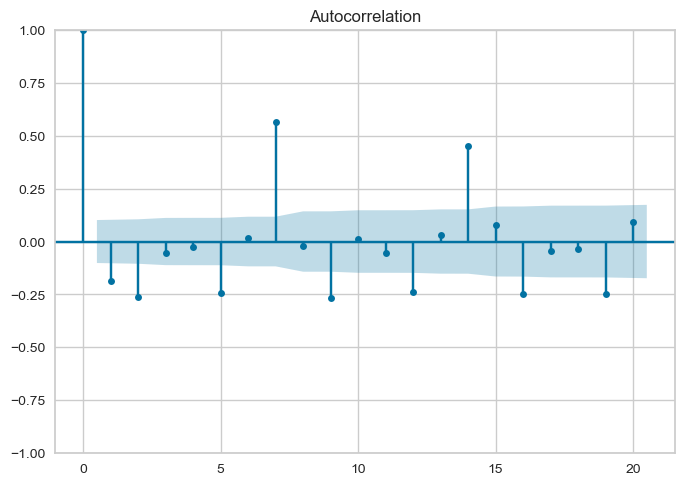

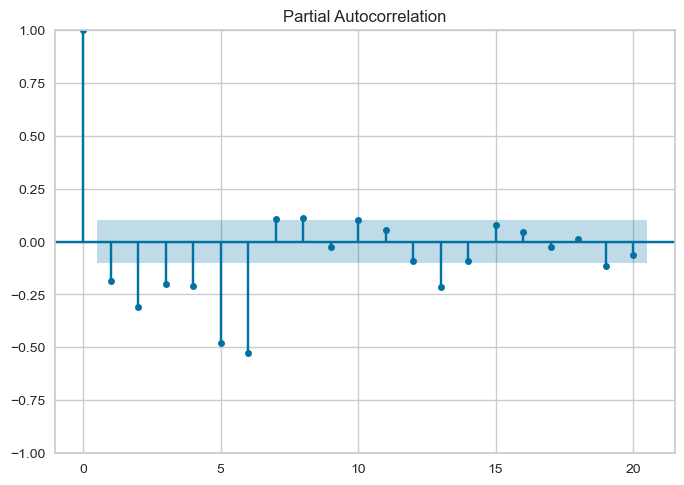

In [69]:
# Vẽ đồ thị ACF và PACF của dữ liệu sai phân lần thứ nhất
plot_acf(data_diff1, lags=20)
plt.show()

plot_pacf(data_diff1, lags=20)
plt.show()

**Dựa trên biểu đồ ACF và PACF trong hình :**

- Tham số p (AR): Xác định bằng biểu đồ PACF. Chọn p là độ mà tại đó PACF có giá trị đáng kể và nằm ngoài vùng tin cậy.
- Tham số q (MA): Xác định bằng biểu đồ ACF. Chọn q là số độ  mà tại đó ACF có giá trị đáng kể và nằm ngoài vùng tin cậy.

**Chuẩn bị dữ liệu cho mô hình ARIMA**

In [70]:
# Chuẩn hóa dữ liệu sai phân
min_value_diff = data_diff1.min()
max_value_diff = data_diff1.max()
normalized_data_diff = (data_diff1 - min_value_diff) / (max_value_diff - min_value_diff)

# Chia dữ liệu sai phân thành tập huấn luyện và kiểm tra
train_diff = normalized_data_diff[:-30]  # Số ngày trong 30 ngày là 30 ngày
test_diff = normalized_data_diff[-30:]  # Số ngày dùng để kiểm tra


**Xây dựng và đánh giá mô hình ARIMA**

In [71]:
# Xác định các tham số p, d, q cho mô hình ARIMA
p = [0, 1, 2, 3, 4, 5, 6]
d = 1
q = [0, 1, 2, 5]
pdq = [(x, d, z) for x in p for z in q]

# Chọn mô hình có AIC thấp nhất
warnings.simplefilter('ignore', ConvergenceWarning)

best_aic_diff = float("inf")
best_pdq_diff = None
for param in pdq:
    try:
        model_diff = ARIMA(train_diff, order=param)
        results_diff = model_diff.fit()
        if results_diff.aic < best_aic_diff:
            best_aic_diff = results_diff.aic
            best_pdq_diff = param
    except Exception as e:
        print(f"Model with parameters p,d,q={param} failed: {e}")
        continue

# Xây dựng mô hình ARIMA tốt nhất cho dữ liệu sai phân
best_model_diff = ARIMA(train_diff, order=best_pdq_diff)
best_results_diff = best_model_diff.fit()

# Đánh giá mô hình
print(best_results_diff.summary())
print("Best p,d,q Parameters:", best_pdq_diff)

                               SARIMAX Results                                
Dep. Variable:           TotalRevenue   No. Observations:                  343
Model:                 ARIMA(5, 1, 5)   Log Likelihood                 272.501
Date:                Sat, 01 Jun 2024   AIC                           -523.002
Time:                        16:54:25   BIC                           -480.819
Sample:                    12-02-2018   HQIC                          -506.198
                         - 11-09-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2717      0.063      4.336      0.000       0.149       0.394
ar.L2         -1.0003      0.042    -23.747      0.000      -1.083      -0.918
ar.L3          0.0851      0.084      1.018      0.3

**Dự đoán và đánh giá mô hình**

In [72]:
# Dự đoán với mô hình tốt nhất cho 30 ngày tiếp theo
forecast_diff = best_results_diff.get_forecast(steps=30)  # 30 ngày
forecast_index_diff = test_diff.index
forecast_series_normalized_diff = pd.Series(forecast_diff.predicted_mean, index=forecast_index_diff)
conf_int_normalized_diff = forecast_diff.conf_int()

# Chuyển đổi dự báo về giá trị thực
forecast_series_diff = forecast_series_normalized_diff * (max_value_diff - min_value_diff) + min_value_diff
conf_int_diff = conf_int_normalized_diff * (max_value_diff - min_value_diff) + min_value_diff
conf_int_diff.index = forecast_index_diff

# Hiển thị kết quả dự đoán
print(forecast_series_diff)

# Đo lường chỉ số lỗi trên dữ liệu chuẩn hóa
mse_diff = _measure_metric(test_diff.values, forecast_series_normalized_diff.values)

Date
2019-11-10    0.166108
2019-11-11   -0.191197
2019-11-12   -0.370767
2019-11-13    0.180629
2019-11-14    0.240542
2019-11-15   -0.114712
2019-11-16    0.043396
2019-11-17    0.235467
2019-11-18   -0.196657
2019-11-19   -0.329889
2019-11-20    0.167138
2019-11-21    0.219535
2019-11-22   -0.133662
2019-11-23    0.038690
2019-11-24    0.239083
2019-11-25   -0.174809
2019-11-26   -0.307715
2019-11-27    0.163212
2019-11-28    0.198449
2019-11-29   -0.147080
2019-11-30    0.033406
2019-12-01    0.240788
2019-12-02   -0.156961
2019-12-03   -0.287708
2019-12-04    0.160202
2019-12-05    0.180746
2019-12-06   -0.157610
2019-12-07    0.028681
2019-12-08    0.240587
2019-12-09   -0.142205
Freq: D, Name: predicted_mean, dtype: float64
Mean Square Error (MSE): 0.019501191888942497


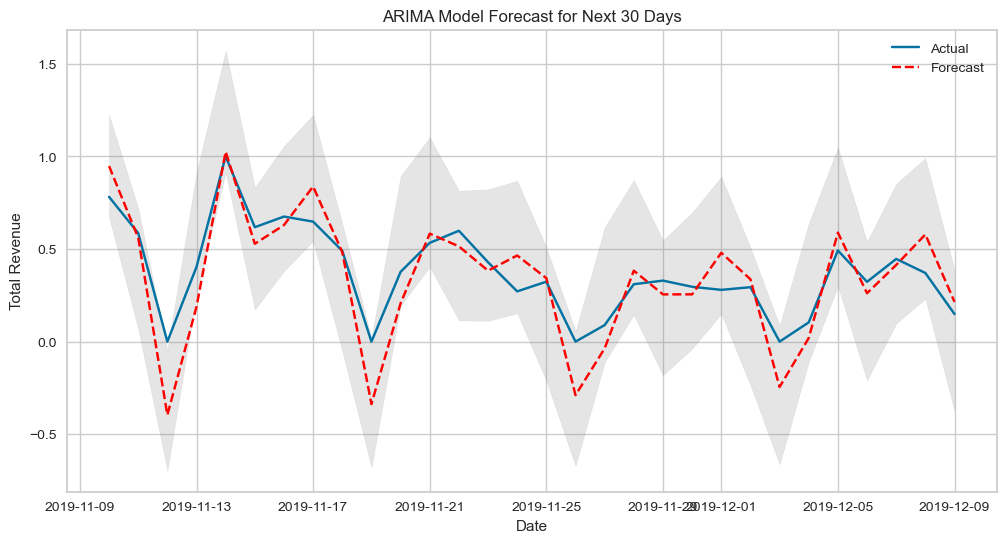

In [95]:
# Chuyển đổi dự báo về giá trị thực
forecast_series = daily_data.iloc[-len(test_diff):] + forecast_series_diff.cumsum()

# Hiển thị kết quả dự đoán và so sánh với giá trị thực tế
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index[-len(test_diff):], daily_data[-len(test_diff):], label='Actual')
plt.plot(forecast_series.index, forecast_series, color='red', linestyle='--', label='Forecast')
plt.fill_between(conf_int_diff.index,
                 conf_int_diff.iloc[:, 0] + daily_data.iloc[-len(test_diff):],
                 conf_int_diff.iloc[:, 1] + daily_data.iloc[-len(test_diff):],
                 color='grey', alpha=0.2)
plt.legend()
plt.title('ARIMA Model Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()


##### **4.4.4. So sánh hiệu suất mô hình**

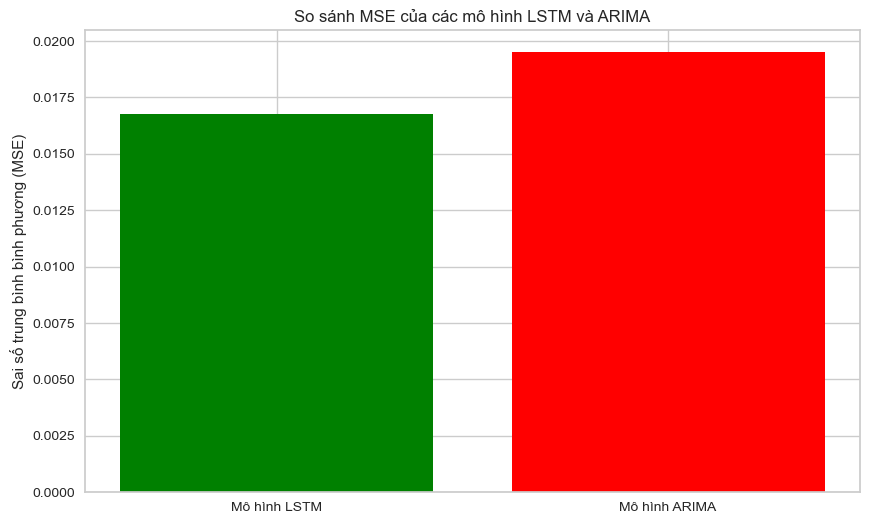

In [88]:
mse_LSTM =mse
mse_ARIMA = mse_diff

mse_values = [mse_LSTM, mse_ARIMA]
labels = ['Mô hình LSTM', 'Mô hình ARIMA']

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(labels, mse_values, color=['green', 'red'])
plt.ylabel('Sai số trung bình bình phương (MSE)')
plt.title('So sánh MSE của các mô hình LSTM và ARIMA')
plt.show()

Dựa trên biểu đồ về MSE của hai mô hình LSTM và ARIMA:

- MSE của LSTM : MSE thấp hơn cho thấy mô hình LSTM có khả năng dự báo tốt hơn trong trường hợp này.
- MSE của ARIMA: MSE cao hơn so với LSTM, điều này có thể chỉ ra rằng mô hình ARIMA không bám sát dữ liệu thực tế như LSTM.

Như vậy doanh nghiệp có thể sử dụng mô hình đự đoán được xây dựng từ ARIMA để dự đoán doanh thu nhằm có chiến lược tốt hơn để thu hút khách hàng cũng như lấy giá trị dự báo đấy để đánh giá các hoạt động trong tương lai.